In [165]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as spy

pd.set_option('display.max_columns', None)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100



df0 = pd.read_csv('missing.csv')
df = df0.drop(columns={'Unnamed: 0'}).copy()

df


,make_model,body_type,price,km,type,previous_owners,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co2_emission,emission_class,comfort_and_convenience,entertainment_and_media,extras,safety_and_security,gears,country_version,hp_kw,age
0,Audi A1,Sedans,15770,56013.000000,Used,2.0,Black,Metallic,Cloth,5.0,5.0,Automatic,1422.0,3.0,1220.0,front,Diesel,3.8,99.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,Germany,66.0,3.0
1,Audi A1,Sedans,14500,80000.000000,Used,1.0,Red,Metallic,Cloth,3.0,4.0,Automatic,1798.0,4.0,1255.0,front,Benzine,5.6,129.0,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0,Germany,141.0,2.0
2,Audi A1,Sedans,14640,83450.000000,Used,1.0,Black,Metallic,Cloth,4.0,4.0,Automatic,1598.0,3.0,1135.0,front,Diesel,3.8,99.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,Germany,85.0,3.0
3,Audi A1,Sedans,14500,73000.000000,Used,1.0,Brown,Metallic,Cloth,3.0,4.0,Automatic,1422.0,3.0,1195.0,-,Diesel,3.8,99.0,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.0,Germany,66.0,3.0
4,Audi A1,Sedans,16790,16200.000000,Used,1.0,Black,Metallic,Cloth,5.0,5.0,Automatic,1422.0,3.0,1135.0,front,Diesel,4.1,109.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7.0,Germany,66.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Van,39950,130438.906868,New,1.0,Grey,Metallic,Cloth,5.0,5.0,Automatic,1997.0,4.0,1758.0,front,Diesel,5.3,139.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",6.0,Germany,147.0,3.0
15915,Renault Espace,Van,39885,9900.000000,Used,1.0,Grey,Metallic,Cloth,5.0,5.0,Automatic,1798.0,4.0,1708.0,front,Benzine,7.4,168.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",7.0,Germany,165.0,0.0
15916,Renault Espace,Van,39875,15.000000,Pre-registered,1.0,White,Metallic,Full leather,5.0,7.0,Automatic,1997.0,4.0,1734.0,front,Diesel,5.3,139.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,Austria,146.0,0.0
15917,Renault Espace,Van,39700,10.000000,Pre-registered,1.0,Grey,Metallic,Part leather,5.0,7.0,Automatic,1997.0,4.0,1758.0,front,Diesel,5.3,139.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",6.0,Germany,147.0,0.0


# Nümerik Veriler

In [166]:
df[["displacement", "weight", "consumption", "co2_emission", "hp_kw", "km"]]

,displacement,weight,consumption,co2_emission,hp_kw,km
0,1422.0,1220.0,3.8,99.0,66.0,56013.000000
1,1798.0,1255.0,5.6,129.0,141.0,80000.000000
2,1598.0,1135.0,3.8,99.0,85.0,83450.000000
3,1422.0,1195.0,3.8,99.0,66.0,73000.000000
4,1422.0,1135.0,4.1,109.0,66.0,16200.000000
...,...,...,...,...,...,...
15914,1997.0,1758.0,5.3,139.0,147.0,130438.906868
15915,1798.0,1708.0,7.4,168.0,165.0,9900.000000
15916,1997.0,1734.0,5.3,139.0,146.0,15.000000
15917,1997.0,1758.0,5.3,139.0,147.0,10.000000


In [167]:
df[["displacement", "weight", "consumption", "co2_emission", "hp_kw", "km"]].describe()

,displacement,weight,consumption,co2_emission,hp_kw,km
count,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000
mean,1424.487880,1336.999246,4.863333,123.016835,88.449482,36515.938994
std,329.783587,200.697383,1.553912,248.493679,26.940100,39591.598737
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1229.000000,1165.000000,4.100000,104.000000,66.000000,5329.000000
50%,1461.000000,1288.000000,4.800000,117.000000,85.000000,23580.000000
75%,1598.000000,1472.000000,5.400000,129.000000,102.000000,54370.500000
max,16000.000000,2471.000000,55.000000,14457.000000,294.000000,317000.000000


In [168]:
df[["displacement", "weight", "consumption", "co2_emission", "hp_kw", "km"]].corr()

,displacement,weight,consumption,co2_emission,hp_kw,km
displacement,1.000000,0.472394,0.012802,0.019060,0.499546,0.216335
weight,0.472394,1.000000,0.043635,0.024897,0.632193,0.131079
consumption,0.012802,0.043635,1.000000,0.053820,0.208298,-0.141983
co2_emission,0.019060,0.024897,0.053820,1.000000,0.046273,-0.010206
hp_kw,0.499546,0.632193,0.208298,0.046273,1.000000,0.022329
km,0.216335,0.131079,-0.141983,-0.010206,0.022329,1.000000


In [169]:
["displacement", "weight", "consumption", "co2_emission", "hp_kw", "km"]:
    

SyntaxError: invalid syntax (610613888.py, line 1)

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(),
           annot=True,  # içerisine değerlerini yazdırırırz
           cmap="YlOrBr",  # renk değiştirir
           center=0.68,    #  grafikteki 0.6 değerindeki renk, sağdakı renk barında ortada olacak şekilde renklendirilir
           );

In [ ]:
df.weight

In [ ]:
g = sns.PairGrid(df,
             y_vars= ["price", "km", "displacement", "weight"], #  istediğimiz sütunları getirir
             x_vars= ["weight", "gears", "hp_kw", "age", "cylinders"], # istediğimiz satırları getirir
                )
                                
g = g.map(sns.scatterplot);

# price - weight / gears / hp_kw
# km - age
# desp  - cylinders / weight / hp_kw
# weight - hp_kw

In [ ]:
g = sns.PairGrid(df[["displacement", "cylinders", "gears","hp_kw", "weight"]],
)
                                
g = g.map(sns.scatterplot);

In [170]:
def limits(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    print("Lower Limit:",lower_lim)
    print("Upper limit:", upper_lim)

In [171]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    return ((df[column]<lower_lim) | (df[column]>upper_lim)).sum()

In [172]:
def dropping_of_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    return df[column].loc[~((df[column]<lower_lim) | (df[column]>upper_lim))]

# Nümerik veriler

## displacement

In [173]:
df["displacement"].describe()

count    15919.000000
mean      1424.487880
std        329.783587
min          1.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max      16000.000000
Name: displacement, dtype: float64

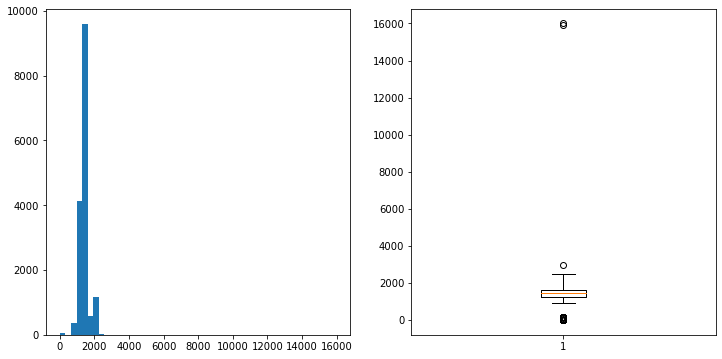

In [174]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.hist(df.displacement  , bins=50)

plt.subplot(122)
plt.boxplot(df.displacement, whis=2.5)

plt.show()

''

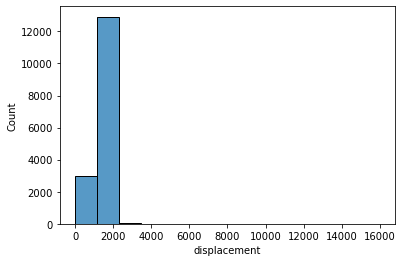

In [175]:
fig, ax = plt.subplots()
sns.histplot(df["displacement"], ax=ax, bins=14)
;

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


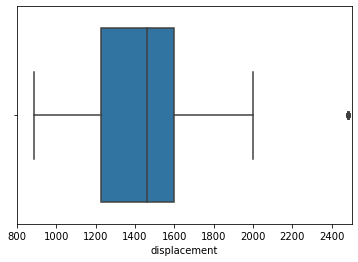

In [176]:
fig, ax = plt.subplots()
sns.boxplot(df["displacement"])
ax.set_xlim(800,2500);

In [177]:
Q1 = df["displacement"].quantile(0.25)
Q1
Q3 = df["displacement"].quantile(0.75)
Q3
IQR = Q3 - Q1
IQR
lower_limit = Q1 - 1.5*IQR
lower_limit
upper_limit = Q3 + 1.5*IQR
upper_limit

print("lower_limit   :  ", lower_limit )
print("upper_limit   :  ", upper_limit )

lower_limit   :   675.5
upper_limit   :   2151.5


In [178]:
df.displacement.sort_values()

14319        1.0
12501        1.0
12798        1.0
12467        1.0
14326        1.0
          ...   
3603      2480.0
3601      2480.0
10771     2967.0
7169     15898.0
10932    16000.0
Name: displacement, Length: 15919, dtype: float64

In [179]:
df[(df.displacement < lower_limit) | (df.displacement > 2500)].shape

(54, 28)

In [180]:
df = df[~((df.displacement < lower_limit) | (df.displacement > 2500))]

In [181]:
df.displacement.describe()

count    15865.000000
mean      1427.020836
std        275.989669
min        890.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max       2480.000000
Name: displacement, dtype: float64

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='displacement'>

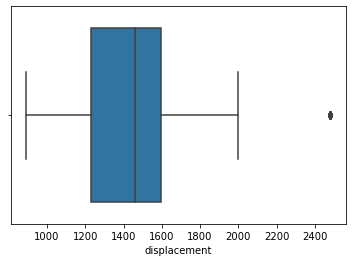

In [182]:
fig, ax = plt.subplots()
sns.boxplot(df["displacement"])

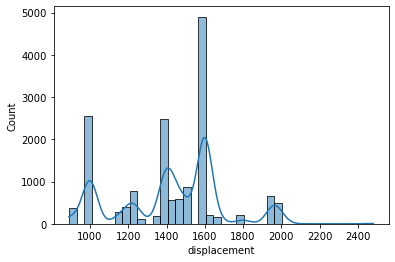

In [183]:
fig, ax = plt.subplots()
sns.histplot(df["displacement"], kde=True,bins=40);

## weight

In [184]:
df.weight.describe()

count    15865.000000
mean      1336.705074
std        200.575903
min          1.000000
25%       1165.000000
50%       1288.000000
75%       1462.000000
max       2471.000000
Name: weight, dtype: float64

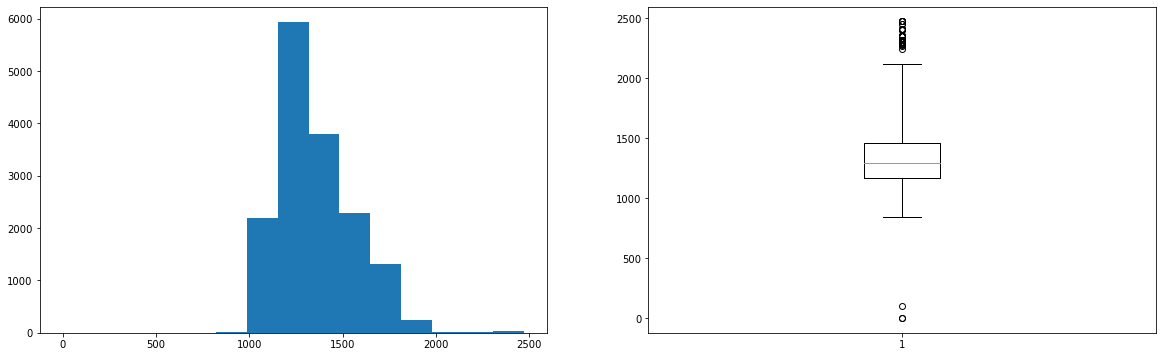

In [185]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.weight, bins=15)

plt.subplot(122)
plt.boxplot(df.weight, whis=2.5)

plt.show()

In [186]:
Q1 = df["weight"].quantile(0.25)
Q1
Q3 = df["weight"].quantile(0.75)
Q3
IQR = Q3 - Q1
IQR
lower_limit = Q1 - 1.5*IQR
lower_limit
upper_limit = Q3 + 1.5*IQR
upper_limit

print("lower_limit   :  ", lower_limit )
print("upper_limit   :  ", upper_limit )

lower_limit   :   719.5
upper_limit   :   1907.5


In [187]:
df[(df.weight < lower_limit) | (df.weight > upper_limit)][["make_model","body_type", "weight"]]

,make_model,body_type,weight
1143,Audi A1,Compact,102.0
5715,Opel Astra,Station wagon,1985.0
5725,Opel Astra,Station wagon,1975.0
5830,Opel Astra,Station wagon,1975.0
5934,Opel Astra,Station wagon,1975.0
5973,Opel Astra,Station wagon,1975.0
5976,Opel Astra,Station wagon,1985.0
6004,Opel Astra,Station wagon,1985.0
6022,Opel Astra,Station wagon,1985.0
6168,Opel Astra,Station wagon,1985.0


In [188]:
df = df[~(df.weight < lower_limit)]

# consumption

In [189]:
df.consumption.describe()

count    15862.000000
mean         4.863454
std          1.555117
min          0.000000
25%          4.100000
50%          4.800000
75%          5.400000
max         55.000000
Name: consumption, dtype: float64

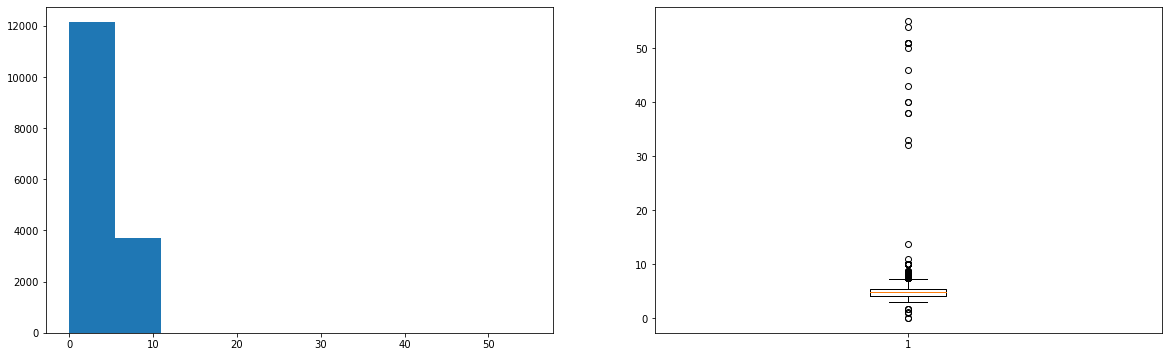

In [190]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.consumption, )

plt.subplot(122)
plt.boxplot(df.consumption, )

plt.show()

In [191]:
Q1 = df["consumption"].quantile(0.25)
Q3 = df["consumption"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print("lower_limit   :  ", lower_limit )
print("upper_limit   :  ", upper_limit )

lower_limit   :   2.1499999999999986
upper_limit   :   7.350000000000001


In [192]:
df[(df.consumption < lower_limit) | (df.consumption > upper_limit)][["make_model","body_type", "consumption"]].sort_values(by="consumption")

,make_model,body_type,consumption
8217,Opel Astra,Sedans,0.0
10566,Opel Insignia,Station wagon,0.0
14902,Renault Duster,Off-Road,1.0
13678,Renault Clio,Off-Road,1.2
3617,Audi A3,Sedans,1.6
...,...,...,...
2210,Audi A1,Sedans,51.0
2196,Audi A1,Sedans,51.0
2194,Audi A1,Sedans,51.0
13179,Renault Clio,Sedans,54.0


In [193]:
df = df[ ~((df.consumption < 2.5) | (df.consumption > 12)) ]

# co2_emission

In [194]:
df.co2_emission.describe()

count    15839.000000
mean       122.913947
std        248.896166
min          5.000000
25%        104.000000
50%        117.000000
75%        129.000000
max      14457.000000
Name: co2_emission, dtype: float64

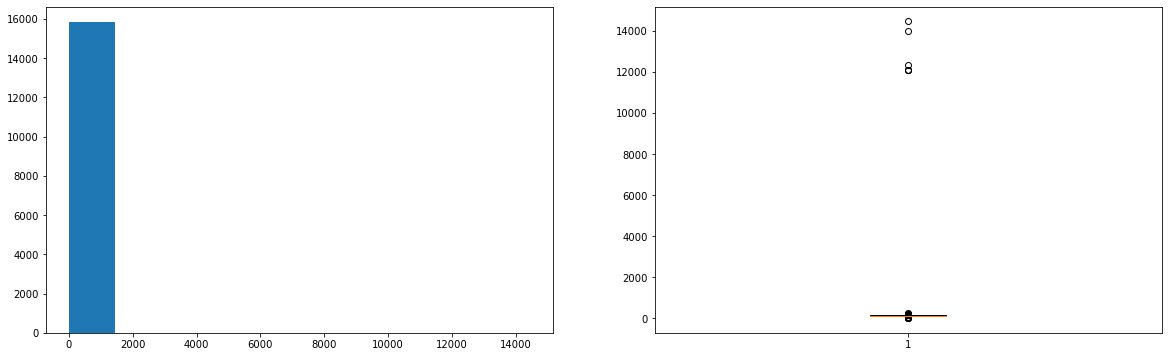

In [195]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.co2_emission, )

plt.subplot(122)
plt.boxplot(df.co2_emission, )

plt.show()

In [196]:
Q1 = df["co2_emission"].quantile(0.25)
Q3 = df["co2_emission"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print("lower_limit   :  ", lower_limit )
print("upper_limit   :  ", upper_limit )

lower_limit   :   66.5
upper_limit   :   166.5


In [197]:
df[(df.consumption < lower_limit) | (df.consumption > upper_limit)][["make_model","body_type", "co2_emission"]].sort_values(by="co2_emission")

,make_model,body_type,co2_emission
13008,Opel Insignia,Other,5.0
6397,Opel Astra,Sedans,5.0
11553,Opel Insignia,Station wagon,5.0
8110,Opel Astra,Station wagon,14.0
12547,Opel Insignia,Sedans,45.0
...,...,...,...
6578,Opel Astra,Station wagon,12087.0
6579,Opel Astra,Station wagon,12087.0
8542,Opel Corsa,Compact,12324.0
12343,Opel Insignia,Sedans,13983.0


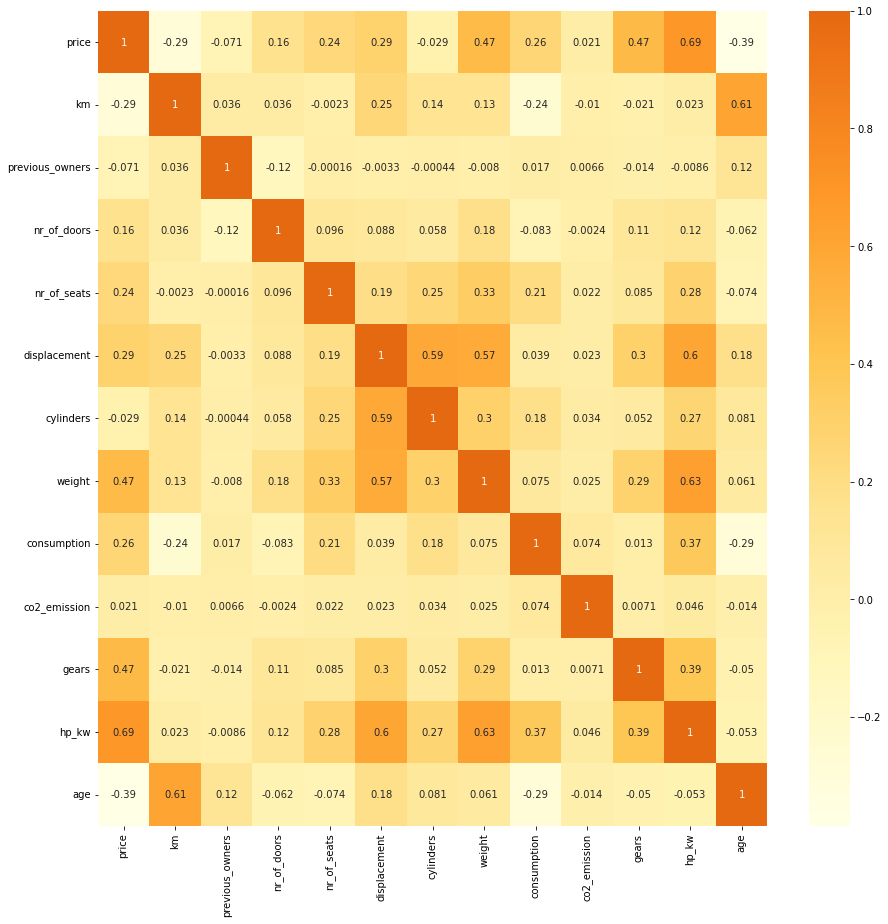

In [198]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(),
           annot=True,  # içerisine değerlerini yazdırırırz
           cmap="YlOrBr",  # renk değiştirir
           center=0.68,    #  grafikteki 0.6 değerindeki renk, sağdakı renk barında ortada olacak şekilde renklendirilir
           );

In [199]:
df.drop(columns="co2_emission", inplace=True)

# hp_kw

In [200]:
limits(df, "hp_kw")

Lower Limit: 13.5
Upper limit: 153.5


In [201]:
outliers(df, "hp_kw")

437

In [202]:
dropping_of_outliers(df, "hp_kw")

0         66.0
1        141.0
2         85.0
3         66.0
4         66.0
         ...  
15911    118.0
15912    147.0
15914    147.0
15916    146.0
15917    147.0
Name: hp_kw, Length: 15402, dtype: float64

In [203]:
df.hp_kw.describe()

count    15839.000000
mean        88.430918
std         26.930615
min          1.000000
25%         66.000000
50%         85.000000
75%        101.000000
max        294.000000
Name: hp_kw, dtype: float64

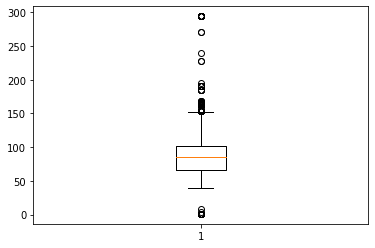

In [204]:
plt.boxplot(df.hp_kw);

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


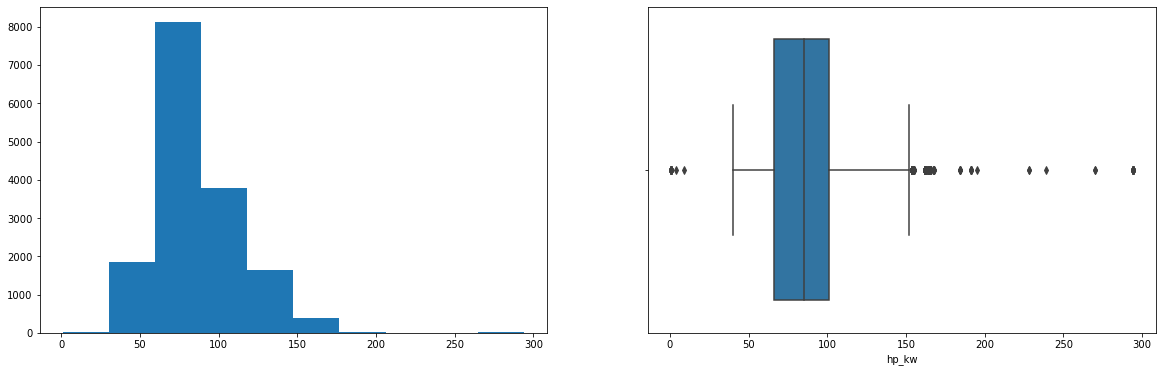

In [205]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hp_kw)

plt.subplot(122)
sns.boxplot(df.hp_kw)

plt.show()

In [206]:
df.hp_kw.sort_values().head(30)

7014      1.0
10610     1.0
10580     1.0
10579     1.0
9285      1.0
10468     1.0
7019      1.0
7018      1.0
7016      1.0
9287      1.0
9288      1.0
9289      1.0
6005      1.0
6034      1.0
9290      1.0
9292      1.0
9299      1.0
15155     1.0
15156     1.0
6946      1.0
13885     4.0
3913      9.0
8857     40.0
13759    40.0
8408     44.0
8711     51.0
8696     51.0
8697     51.0
8701     51.0
8721     51.0
Name: hp_kw, dtype: float64

In [207]:
df[(df.hp_kw <51)].shape

(25, 27)

In [208]:
df = df[ ~(df.hp_kw <51) ]

# Kategorik veriler

In [224]:
df

,make_model,body_type,price,km,type,previous_owners,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,emission_class,comfort_and_convenience,entertainment_and_media,extras,safety_and_security,gears,country_version,hp_kw,age
0,Audi A1,Sedans,15770,56013.000000,Used,2.0,Black,Metallic,Cloth,5.0,5.0,Automatic,1422.0,3.0,1220.0,front,Diesel,3.8,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,Germany,66.0,3.0
1,Audi A1,Sedans,14500,80000.000000,Used,1.0,Red,Metallic,Cloth,3.0,4.0,Automatic,1798.0,4.0,1255.0,front,Benzine,5.6,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0,Germany,141.0,2.0
2,Audi A1,Sedans,14640,83450.000000,Used,1.0,Black,Metallic,Cloth,4.0,4.0,Automatic,1598.0,3.0,1135.0,front,Diesel,3.8,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,Germany,85.0,3.0
3,Audi A1,Sedans,14500,73000.000000,Used,1.0,Brown,Metallic,Cloth,3.0,4.0,Automatic,1422.0,3.0,1195.0,-,Diesel,3.8,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.0,Germany,66.0,3.0
4,Audi A1,Sedans,16790,16200.000000,Used,1.0,Black,Metallic,Cloth,5.0,5.0,Automatic,1422.0,3.0,1135.0,front,Diesel,4.1,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7.0,Germany,66.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Van,39950,130438.906868,New,1.0,Grey,Metallic,Cloth,5.0,5.0,Automatic,1997.0,4.0,1758.0,front,Diesel,5.3,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",6.0,Germany,147.0,3.0
15915,Renault Espace,Van,39885,9900.000000,Used,1.0,Grey,Metallic,Cloth,5.0,5.0,Automatic,1798.0,4.0,1708.0,front,Benzine,7.4,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",7.0,Germany,165.0,0.0
15916,Renault Espace,Van,39875,15.000000,Pre-registered,1.0,White,Metallic,Full leather,5.0,7.0,Automatic,1997.0,4.0,1734.0,front,Diesel,5.3,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,Austria,146.0,0.0
15917,Renault Espace,Van,39700,10.000000,Pre-registered,1.0,Grey,Metallic,Part leather,5.0,7.0,Automatic,1997.0,4.0,1758.0,front,Diesel,5.3,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",6.0,Germany,147.0,0.0


C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


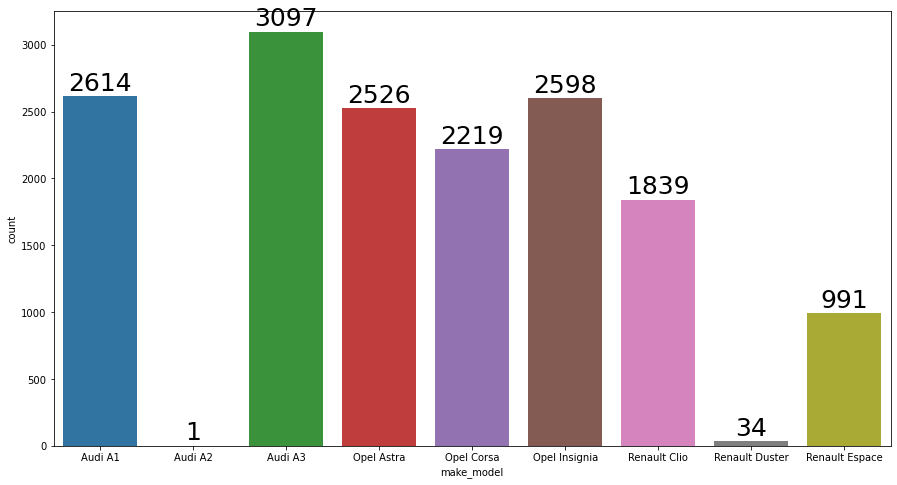

In [53]:
ax = sns.countplot(df.make_model)
ax.bar_label(ax.containers[0], padding=1, size=25);

# Audi A2'i düşürmek

In [232]:
df = df[ ~(df.make_model == "Audi A2") ]

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Sedans           0.500063
Station wagon    0.222714
Compact          0.198748
Van              0.049070
Other            0.018338
Transporter      0.005565
Off-Road         0.003415
Coupe            0.001581
Convertible      0.000506
Name: body_type, dtype: float64

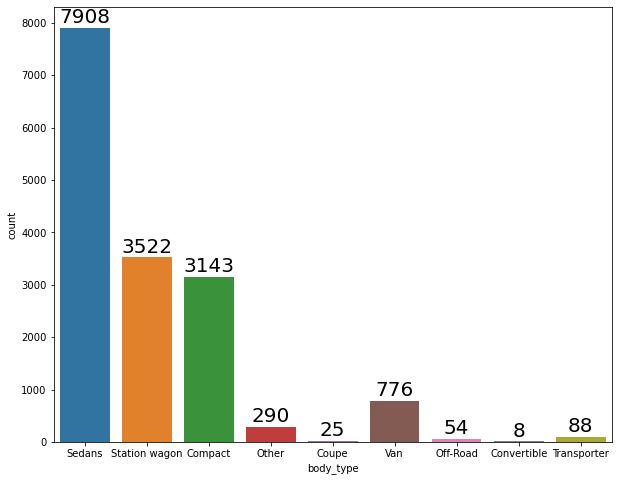

In [229]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(df.body_type)
ax.bar_label(ax.containers[0], padding=1, size=20);
df.body_type.value_counts(normalize=True)

In [237]:
df.body_type.value_counts()

Sedans           7908
Station wagon    3522
Compact          3143
Van               776
Other             290
Transporter        88
Off-Road           53
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [251]:
df["body_type"] = df["body_type"].transform(lambda x :  "Other" if x in ["Transporter", "Off-Road", "Coupe", "Convertible"] else x )

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_19120\3473179887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["body_type"] = df["body_type"].transform(lambda x :  "Other" if x in ["Transporter", "Off-Road", "Coupe", "Convertible"] else x )


body_type
Compact          3143
Other             464
Sedans           7908
Station wagon    3522
Van               776
Name: make_model, dtype: int64

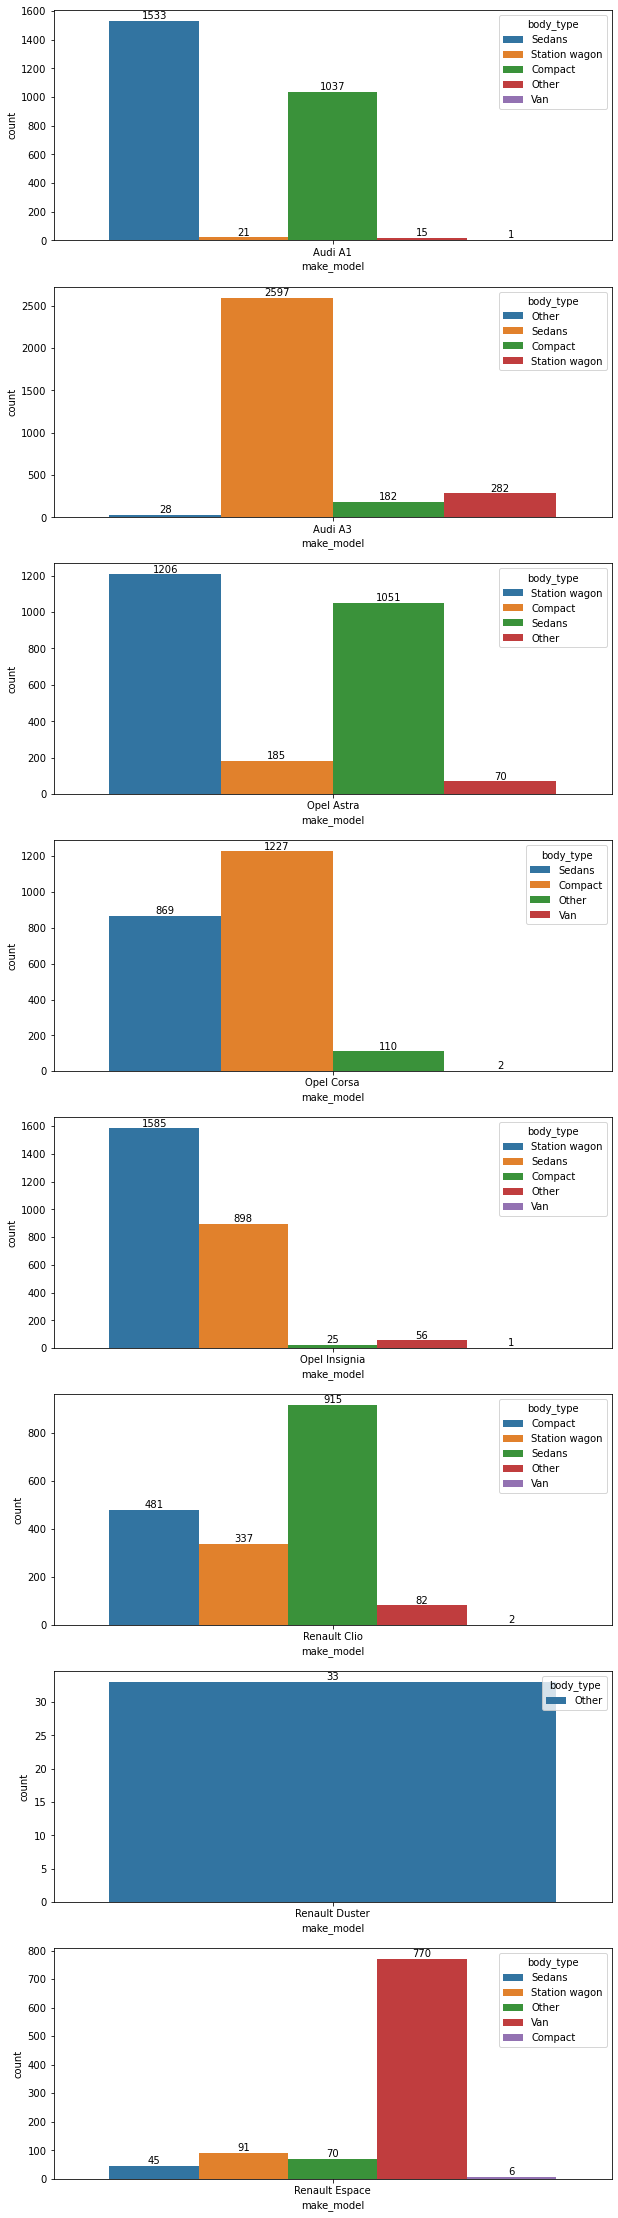

In [252]:
plt.figure(figsize=(10, 45))
row = 1
for i in df.make_model.unique() :
        plt.subplot(9,1,row)
        ax = sns.countplot(x ="make_model",  data = df[df.make_model == i], hue="body_type" )
        row += 1
        for container in ax.containers:
            ax.bar_label(container);
            


df.groupby(["body_type"])["make_model"].count()
# body_type 

In [253]:
df["make"] = df.make_model.str.split().str[0]

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_19120\952220736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["make"] = df.make_model.str.split().str[0]


C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


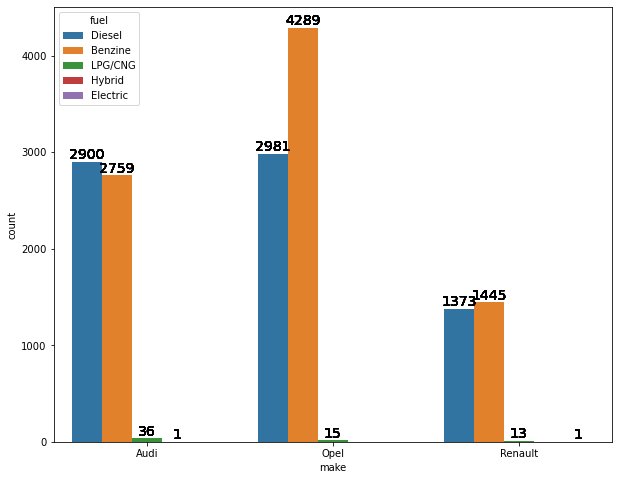

In [257]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(df.make, hue= df.fuel)

for p in ax.patches:
    ax.bar_label(ax.containers[0], size=14)
    ax.bar_label(ax.containers[1], size=14)
    ax.bar_label(ax.containers[2], size=14)
    ax.bar_label(ax.containers[3], size=14)
    ax.bar_label(ax.containers[4], size=14);
            
# Hybrid ve Electric araçlar 

In [ ]:
df.drop(columns="make", inplace= True)

In [259]:
df = df[(df.fuel != "Hybrid") & (df.fuel != "Electric")]

Used              11036
New                1640
Pre-registered     1353
Employee's car     1008
Demonstration       774
Name: type, dtype: int64

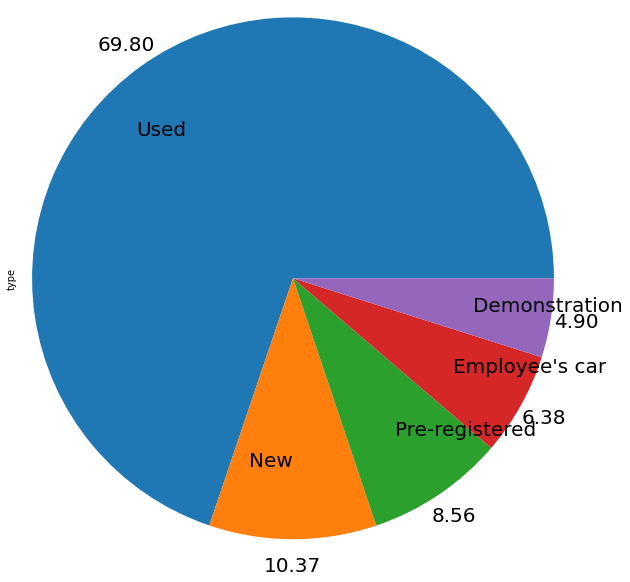

In [260]:
df.type.value_counts().plot.pie(figsize=(10,10),  
                                 subplots=True,   
                                 autopct="%.2f",  
                                 labeldistance=0.7, 
                                   pctdistance=1.1,  
                                   fontsize=20 , 
                                   radius=1.2, 
                                      );

df.type.value_counts()

1.0    14110
2.0     1337
0.0      345
3.0       17
4.0        2
Name: previous_owners, dtype: int64

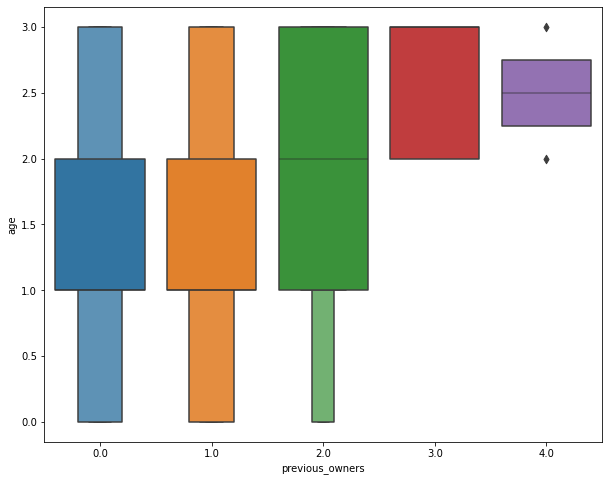

In [271]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x = "previous_owners" , y="age" , data=df) ;
df.previous_owners.value_counts()

In [273]:
df = df[(df.previous_owners != 3 )  &  (df.previous_owners != 4 )]

In [277]:
df.body_color.value_counts(normalize=True)

Black     0.244238
Grey      0.228787
White     0.222518
Silver    0.106890
Blue      0.094795
Red       0.063070
Brown     0.018237
Green     0.009625
Beige     0.006776
Yellow    0.003229
Violet    0.001140
Bronze    0.000380
Orange    0.000190
Gold      0.000127
Name: body_color, dtype: float64

In [279]:
df["body_color"] = df["body_color"].transform(lambda x :  "Other" if x in ['Brown','Beige', 'Violet', 'Yellow', 'Green', 'Bronze', 'Orange', 'Gold'] else x )

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_19120\3072923788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["body_color"] = df["body_color"].transform(lambda x :  "Other" if x in ['Brown','Beige', 'Violet', 'Yellow', 'Green', 'Bronze', 'Orange', 'Gold'] else x )


In [280]:
df.body_color.value_counts(normalize=True)

Black     0.244238
Grey      0.228787
White     0.222518
Silver    0.106890
Blue      0.094795
Red       0.063070
Other     0.039704
Name: body_color, dtype: float64

In [227]:
df.paint_type.value_counts()

Metallic       15361
Uni/basic        543
Perl effect       15
Name: paint_type, dtype: int64

In [283]:
df = df[df.paint_type != "Perl effect"]

In [228]:
df.upholstery.value_counts()

Cloth           11729
Part leather     2106
Full leather     1414
Other             512
Velour             82
alcantara          76
Name: upholstery, dtype: int64

In [284]:
df["upholstery"] = df["upholstery"].transform(lambda x :  "Other" if x in ['Velour','alcantara'] else x )

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_19120\823745772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["upholstery"] = df["upholstery"].transform(lambda x :  "Other" if x in ['Velour','alcantara'] else x )


# nr_of_doors

5.0    11621
4.0     3104
3.0      840
2.0      217
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

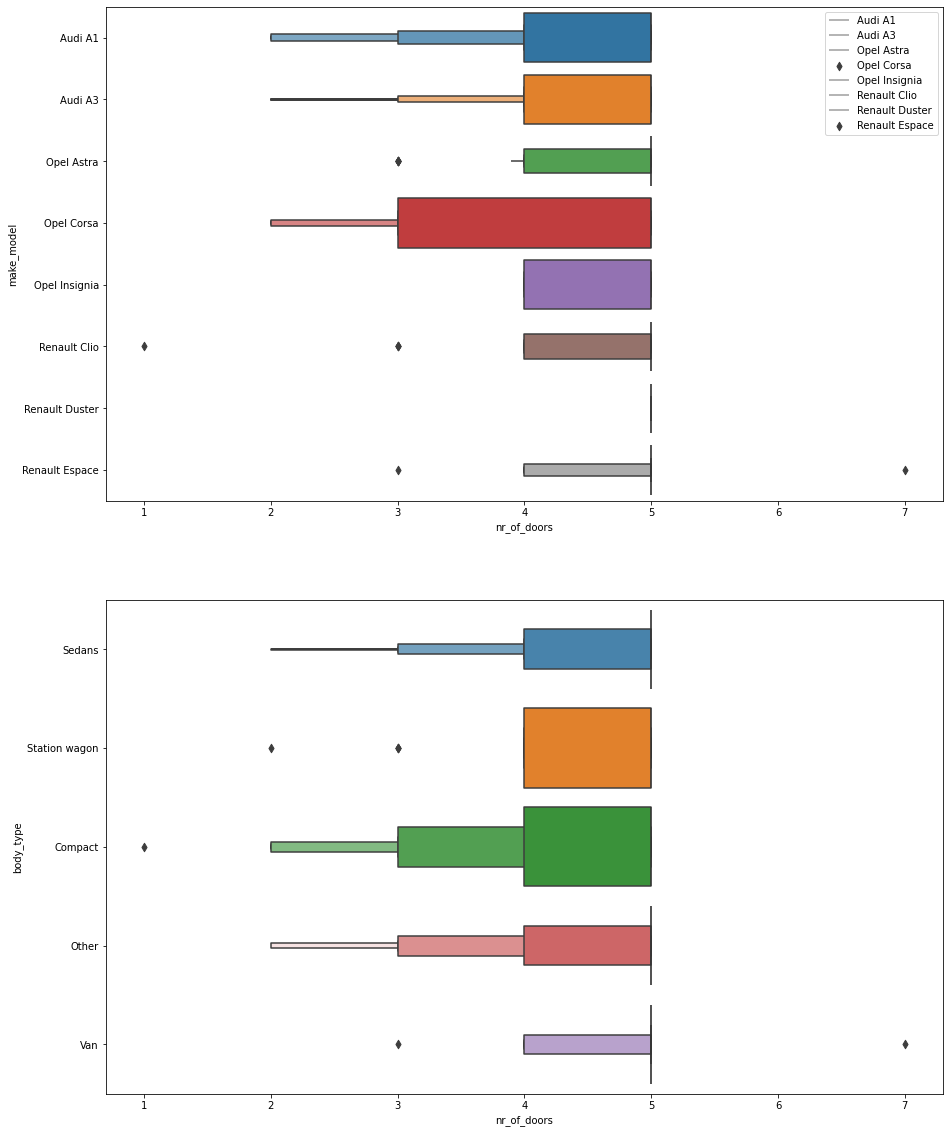

In [286]:
plt.figure(figsize=(15,20))

plt1 = plt.subplot(2,1,1)
ax1 = sns.boxenplot(x = "nr_of_doors", data= df , y="make_model")
plt1.legend(df.make_model.unique())

plt.subplot(2,1,2)
sns.boxenplot(x = "nr_of_doors", data= df , y="body_type")

df.nr_of_doors.value_counts()

In [290]:
df = df[(df.nr_of_doors != 1 ) &  (df.nr_of_doors != 7 )]

5.0    11621
4.0     3104
3.0      840
2.0      217
Name: nr_of_doors, dtype: int64

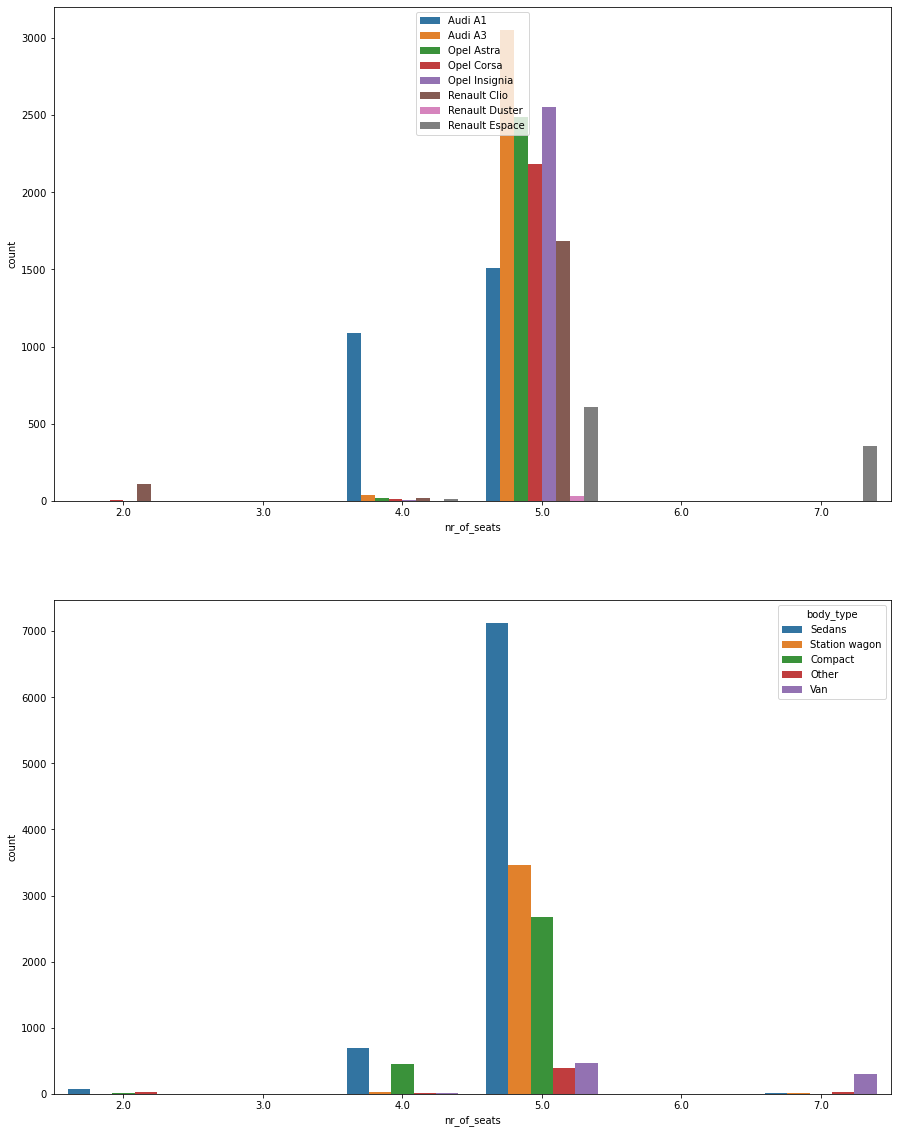

In [294]:
plt.figure(figsize=(15,20))

plt1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = "nr_of_seats", data= df , hue="make_model")
plt1.legend(df.make_model.unique())

plt.subplot(2,1,2)
sns.countplot(x = "nr_of_seats", data= df , hue="body_type")

df.nr_of_doors.value_counts()

In [295]:
df.gearing_type.value_counts()

Manual            8072
Automatic         7246
Semi-automatic     464
Name: gearing_type, dtype: int64

In [264]:
df.cylinders.value_counts()

4.0    12927
3.0     2962
5.0       22
6.0        3
8.0        2
2.0        2
1.0        1
Name: cylinders, dtype: int64

<AxesSubplot:xlabel='cylinders', ylabel='displacement'>

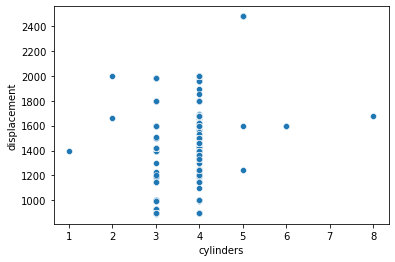

In [297]:
sns.scatterplot(x = "cylinders", y = "displacement", data = df )

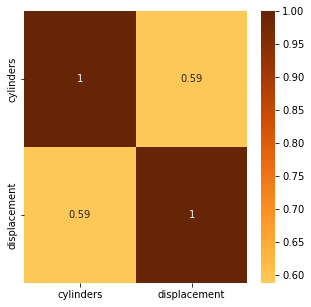

In [300]:
plt.figure(figsize=(5,5))
sns.heatmap(data = df[["cylinders","displacement"]].corr(),
           annot=True,  # içerisine değerlerini yazdırırırz
           cmap="YlOrBr",  # renk değiştirir
           center=0.68,    #  grafikteki 0.6 değerindeki renk, sağdakı renk barında ortada olacak şekilde renklendirilir
           );

In [321]:
df = df[(df.cylinders != 1 ) &  (df.cylinders != 2 )]

In [306]:
df[(df.cylinders == 4 ) ][["cylinders","displacement"]].sort_values(by = ["displacement"])

,cylinders,displacement
14645,4.0,898.0
14809,4.0,898.0
14812,4.0,898.0
14817,4.0,898.0
14819,4.0,898.0
...,...,...
12462,4.0,2000.0
12464,4.0,2000.0
12469,4.0,2000.0
11988,4.0,2000.0


In [270]:
df.drive_chain.value_counts()

front    8886
-        6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [324]:
df.drive_chain.replace("-", np.nan, inplace=True)

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_19120\64840613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drive_chain.replace("-", np.nan, inplace=True)


In [330]:
for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
                    
            cond1 = (df["make_model"]==group1)
            cond2 = (df["make_model"]==group1) & (df["body_type"]==group2)

            mode1 = list(df[cond1]["drive_chain"].mode())
            mode2 = list(df[cond2]["drive_chain"].mode())
            
            
            if mode2 != []:
                df.loc[cond2, "drive_chain"] = df.loc[cond2, "drive_chain"].fillna(df[cond2]["drive_chain"].mode()[0])
            else:
                df.loc[cond2, "drive_chain"] = df.loc[cond2, "drive_chain"].fillna(df["drive_chain"].mode()[0])

In [331]:
df.drive_chain.value_counts(dropna=False)

front    15531
4WD        244
rear         4
Name: drive_chain, dtype: int64

In [334]:
df.drive_chain = df.drive_chain.transform(lambda x : "front" if x == "rear" else x)

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_19120\144073880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drive_chain = df.drive_chain.transform(lambda x : "front" if x == "rear" else x)


In [336]:
df.emission_class.value_counts()

Euro 6          12814
Euro 6d-TEMP     2569
Euro 6c           172
Euro 5             94
Euro 6d            90
Euro 4             40
Name: emission_class, dtype: int64

In [279]:
df.gears.value_counts()

6.0     8615
5.0     4255
7.0     2810
8.0      225
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

In [338]:
df = df[ ~((df.gears < 5 ) | (df.gears == 9) )]

In [292]:
df.country_version.value_counts()

Germany           8842
Italy             2729
Netherlands        956
European Union     893
Spain              819
Belgium            759
Austria            412
Czech Republic     113
France              97
Denmark             89
Poland              81
Hungary             39
Japan               29
Sweden              22
Croatia             13
Bulgaria             7
Slovakia             6
Romania              4
Egypt                4
Serbia               2
Luxembourg           1
Switzerland          1
Slovenia             1
Name: country_version, dtype: int64

In [340]:
df = df[ ~((df.country_version == "Japan" ) | (df.country_version == "Egypt" ) )]

In [341]:
df.country_version.value_counts()

Germany           8752
Italy             2707
Netherlands        934
European Union     892
Spain              815
Belgium            750
Austria            408
Czech Republic     113
France              96
Denmark             89
Poland              81
Hungary             39
Sweden              22
Croatia             13
Bulgaria             7
Slovakia             6
Romania              4
Serbia               2
Luxembourg           1
Switzerland          1
Slovenia             1
Name: country_version, dtype: int64

In [342]:
European = ["France" , "Denmark","Poland" ,"Hungary" , "Sweden", "Croatia" , 
             "Bulgaria", "Slovakia" , "Romania", "Serbia" , "Luxembourg",
            "Switzerland","Slovenia" ]
df.country_version = df.country_version.transform(lambda x : "European Union" if x in European else x)

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_19120\284115516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.country_version = df.country_version.transform(lambda x : "European Union" if x in European else x)


In [343]:
df.country_version.value_counts()

Germany           8752
Italy             2707
European Union    1254
Netherlands        934
Spain              815
Belgium            750
Austria            408
Czech Republic     113
Name: country_version, dtype: int64

In [295]:
df.age.value_counts()

1.0    5058
3.0    4078
2.0    3628
0.0    3155
Name: age, dtype: int64

# km

In [348]:
limits(df,"km")

Lower Limit: -67626.5
Upper limit: 127377.5


In [349]:
outliers(df,"km")

507

In [350]:
df.km.sort_values()

8098          0.0
5672          0.0
9892          0.0
12512         0.0
2370          0.0
           ...   
15277    240000.0
6224     248000.0
5712     260000.0
3003     291800.0
9279     317000.0
Name: km, Length: 15733, dtype: float64

In [353]:
df.km.describe()

count     15733.000000
mean      36556.009046
std       39596.207335
min           0.000000
25%        5500.000000
50%       23620.000000
75%       54251.000000
max      317000.000000
Name: km, dtype: float64

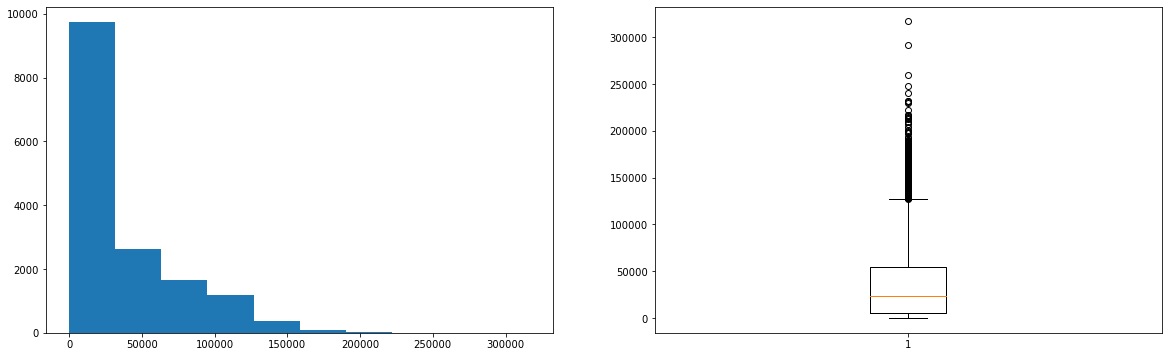

In [365]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.km, )

plt.subplot(122)
plt.boxplot(df.km, )

plt.show()

C:\Users\MONSTER\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


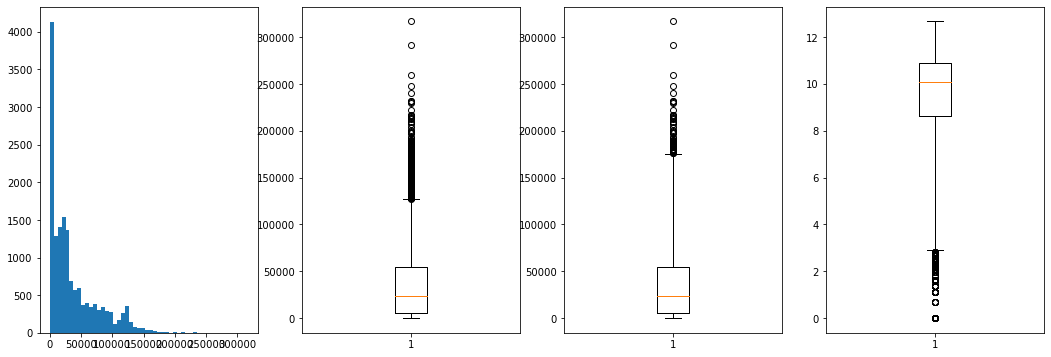

In [366]:
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.km, bins=50)

plt.subplot(142)
plt.boxplot(df.km)

plt.subplot(143)
plt.boxplot(df.km, whis=2.5)

plt.subplot(144)
plt.boxplot(np.log(df.km), whis=2.5)

plt.show()

# price

In [367]:
df.price.describe()

count    15733.000000
mean     17992.544969
std       7311.553458
min         13.000000
25%      12880.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

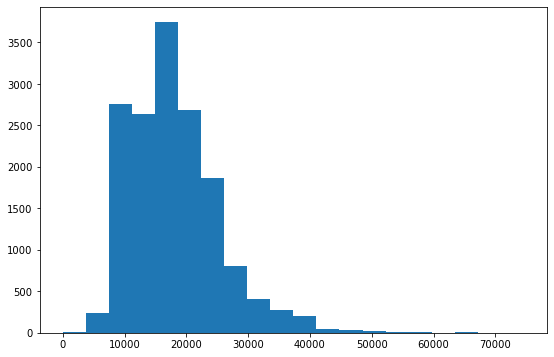

In [368]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.hist(df.price, bins=20);

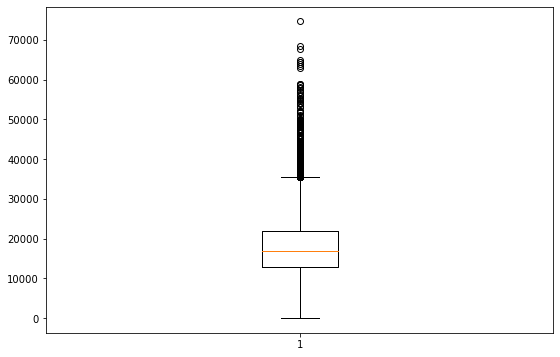

In [372]:
plt.figure(figsize=(20, 6))
plt.subplot(122)
plt.boxplot(df.price);

In [373]:
drop_index = df.price.sort_values().index[:4]
drop_index

Int64Index([8594, 8828, 6066, 8829], dtype='int64')

In [374]:
df.price.sort_values().index[:4]

Int64Index([8594, 8828, 6066, 8829], dtype='int64')

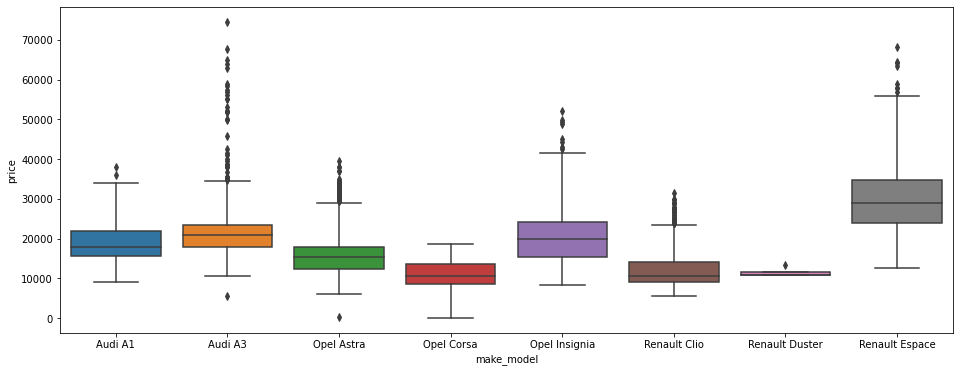

In [379]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="make_model", y="price", data=df, whis= 2)
plt.show()

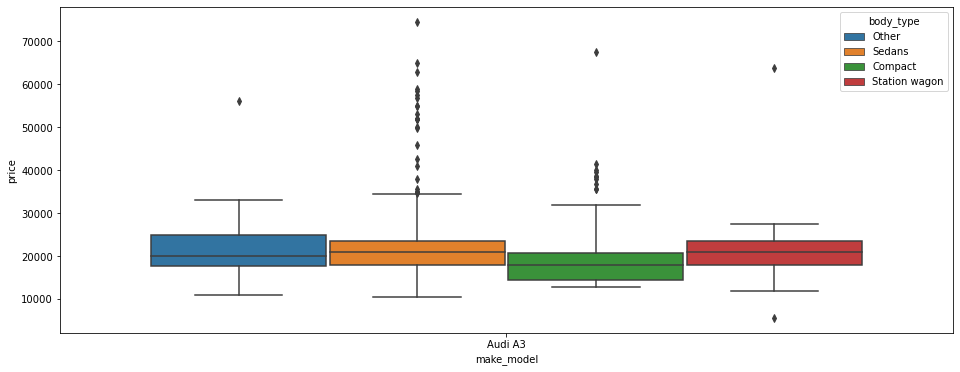

In [384]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="make_model", y="price", data=df[df.make_model == "Audi A3"], hue="body_type", whis= 2)
plt.show()

In [382]:
df[df.make_model == "Audi A3"].groupby(["body_type", "age"])["price"].mean()

body_type      age
Compact        0.0    30113.866667
               1.0    22381.151515
               2.0    20705.243902
               3.0    15198.945652
Other          1.0    25962.555556
               2.0    23494.000000
               3.0    16870.000000
Sedans         0.0    25115.239044
               1.0    22631.901682
               2.0    20421.464630
               3.0    17268.048571
Station wagon  0.0    25166.048387
               1.0    21901.382979
               2.0    20160.791209
               3.0    17221.200000
Name: price, dtype: float64

In [406]:
df[df.make_model == "Audi A3"].groupby(["body_type", "age", "km_new"])["price"].describe()

count          mean           std      min  \
body_type     age km_new                                               
Compact       0.0 2         9.0  36557.555556   4772.920231  24900.0   
                  3         6.0  20448.333333   2697.557537  15500.0   
              1.0 2         7.0  24637.714286   8217.676572  14500.0   
                  3        26.0  21773.615385   2004.826478  18700.0   
              2.0 2         7.0  21478.142857   5295.963319  16990.0   
                  3        34.0  20546.117647   8571.351450  13790.0   
              3.0 2        47.0  14374.659574   2137.575224  13100.0   
                  3        45.0  16059.866667   1500.036721  12900.0   
Other         1.0 2         3.0  20624.333333   8486.703502  10893.0   
                  3         6.0  28631.666667  13746.243729  20200.0   
              2.0 2         5.0  23668.000000   6159.372533  18900.0   
                  3         5.0  23320.000000   6438.225687  17650.0   
              3.0 3         9.0  16870.000000   2180.613446  12550.0   
Sedans        0.0 2       255.0  24761.035294   1659.484398  19078.0   
                  3       247.0  25480.914980   2915.190347  20000.0   
              1.0 2       179.0  22493.368715   2412.572132  17996.0   
                  3       594.0  22673.648148   5525.676893  14250.0   
              2.0 2       148.0  21340.000000   2875.024297  15900.0   
                  3       474.0  20134.664557   4011.250205  10550.0   
              3.0 2       137.0  19108.562044   4066.014631  13900.0   
                  3       563.0  16820.179396   3169.214934  10950.0   
Station wagon 0.0 2        32.0  24672.968750   1524.220636  20980.0   
                  3        30.0  25692.000000   7514.203746  17990.0   
              1.0 2        25.0  22839.600000   1721.743883  18980.0   
                  3        22.0  20835.227273   3729.763965   5555.0   
              2.0 2        51.0  21429.803922   2621.284609  18200.0   
                  3        40.0  18542.800000   1849.368946  14590.0   
              3.0 2        25.0  20893.160000   3612.781715  14550.0   
                  3        55.0  15552.127273   1871.844229  11790.0   

                               25%      50%       75%      max  
body_type     age km_new                                        
Compact       0.0 2       35495.00  37998.0  38725.00  41495.0  
                  3       20300.00  20645.0  21972.50  23300.0  
              1.0 2       20445.00  22675.0  27220.00  39959.0  
                  3       20137.50  22125.0  22712.25  27288.0  
              2.0 2       18892.50  18950.0  22336.00  31950.0  
                  3       17512.50  19150.0  20810.00  67600.0  
              3.0 2       13500.00  13500.0  13725.00  24860.0  
                  3       14990.00  15950.0  17444.00  18500.0  
Other         1.0 2       17691.50  24490.0  25490.00  26490.0  
                  3       22125.00  22500.0  26992.50  56100.0  
              2.0 2       19000.00  20500.0  26990.00  32950.0  
                  3       17650.00  20900.0  29500.00  30900.0  
              3.0 3       15500.00  16990.0  18000.00  20000.0  
Sedans        0.0 2       23800.00  24900.0  25750.00  30000.0  
                  3       24200.00  24980.0  26499.00  62900.0  
              1.0 2       20890.00  21978.0  23600.00  33800.0  
                  3       20899.25  21575.0  22900.00  74600.0  
              2.0 2       19056.00  21465.0  22744.50  34738.0  
                  3       17991.25  19420.0  21000.00  55000.0  
              3.0 2       15480.00  17890.0  22730.00  27318.0  
                  3       15390.00  15990.0  17900.00  42500.0  
Station wagon 0.0 2       23601.75  24989.5  25821.00  27400.0  
                  3       23478.75  24550.0  26337.50  63900.0  
              1.0 2       21854.00  22900.0  23700.00  25990.0  
                  3       20092.50  21340.0  22805.00  23800.0  
              2.0 2       19245.00  20

In [417]:
df[  ( df.make_model == "Audi A3" )  &  ( df.price > 50000 ) & ( df.age >1 ) ][["make_model","body_type","price","km", "age", "dis_new"]]

,make_model,body_type,price,km,age,dis_new
3598,Audi A3,Sedans,55000,24000.0,2.0,5
3601,Audi A3,Sedans,51900,19000.0,2.0,5
3605,Audi A3,Sedans,51999,33000.0,2.0,5
3649,Audi A3,Compact,67600,37747.0,2.0,5


In [418]:
df[   ( df.price > 50000 ) & ( df.age >1 ) ][["make_model","body_type","price","km", "age", "dis_new"]]

,make_model,body_type,price,km,age,dis_new
3598,Audi A3,Sedans,55000,24000.000000,2.0,5
3601,Audi A3,Sedans,51900,19000.000000,2.0,5
3605,Audi A3,Sedans,51999,33000.000000,2.0,5
3649,Audi A3,Compact,67600,37747.000000,2.0,5
15821,Renault Espace,Station wagon,50950,69813.819715,2.0,5


In [426]:
df[( df.price < 5000 ) & ( df.age <=1 ) ][["make_model","body_type","price","km", "age", "dis_new"]]

,make_model,body_type,price,km,age,dis_new
6066,Opel Astra,Station wagon,255,5563.0,1.0,4
8594,Opel Corsa,Sedans,13,123.0,1.0,3
8828,Opel Corsa,Compact,120,12.0,0.0,2
8829,Opel Corsa,Other,331,10.0,0.0,2


In [404]:
def group1(x):
    if np.isnan(x):
        return x
    elif x < 750 :
        return 1
    elif x < 1500 :
        return 2
    elif x < 2500 :
        return 3
    elif x < 3000 :
        return 4
    else:
        return 5

In [405]:
df["km_new"] = df.displacement.transform(group1)

In [390]:
df.km.describe()  df.

count     15733.000000
mean      36556.009046
std       39596.207335
min           0.000000
25%        5500.000000
50%       23620.000000
75%       54251.000000
max      317000.000000
Name: km, dtype: float64

In [394]:
df["km"].quantile(0.50) #  0.99 100 000

23620.0

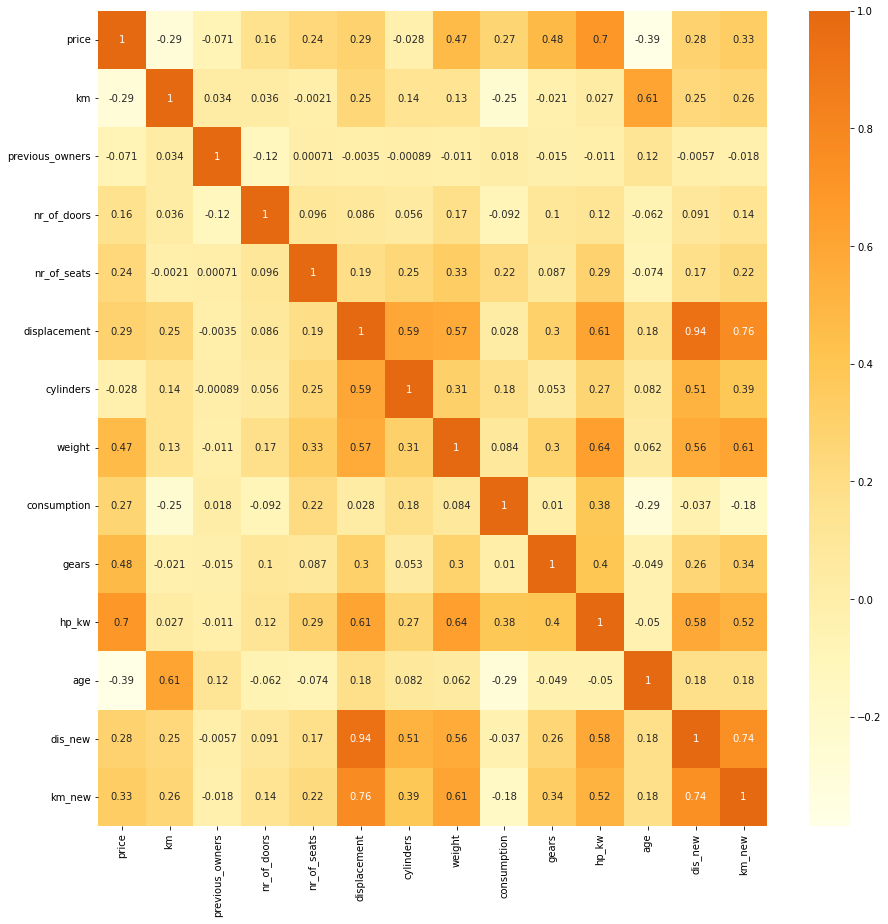

In [408]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(),
           annot=True,  # içerisine değerlerini yazdırırırz
           cmap="YlOrBr",  # renk değiştirir
           center=0.68,    #  grafikteki 0.6 değerindeki renk, sağdakı renk barında ortada olacak şekilde renklendirilir
           );

In [430]:
df.drop(columns={"dis_new","km_new"}, inplace=True)

In [452]:
df.to_csv("outlier.csv")

In [431]:
df

,make_model,body_type,price,km,type,previous_owners,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,emission_class,comfort_and_convenience,entertainment_and_media,extras,safety_and_security,gears,country_version,hp_kw,age
0,Audi A1,Sedans,15770,56013.000000,Used,2.0,Black,Metallic,Cloth,5.0,5.0,Automatic,1422.0,3.0,1220.0,front,Diesel,3.8,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,Germany,66.0,3.0
1,Audi A1,Sedans,14500,80000.000000,Used,1.0,Red,Metallic,Cloth,3.0,4.0,Automatic,1798.0,4.0,1255.0,front,Benzine,5.6,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0,Germany,141.0,2.0
2,Audi A1,Sedans,14640,83450.000000,Used,1.0,Black,Metallic,Cloth,4.0,4.0,Automatic,1598.0,3.0,1135.0,front,Diesel,3.8,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,Germany,85.0,3.0
3,Audi A1,Sedans,14500,73000.000000,Used,1.0,Other,Metallic,Cloth,3.0,4.0,Automatic,1422.0,3.0,1195.0,front,Diesel,3.8,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.0,Germany,66.0,3.0
4,Audi A1,Sedans,16790,16200.000000,Used,1.0,Black,Metallic,Cloth,5.0,5.0,Automatic,1422.0,3.0,1135.0,front,Diesel,4.1,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7.0,Germany,66.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Van,39950,130438.906868,New,1.0,Grey,Metallic,Cloth,5.0,5.0,Automatic,1997.0,4.0,1758.0,front,Diesel,5.3,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",6.0,Germany,147.0,3.0
15915,Renault Espace,Van,39885,9900.000000,Used,1.0,Grey,Metallic,Cloth,5.0,5.0,Automatic,1798.0,4.0,1708.0,front,Benzine,7.4,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",7.0,Germany,165.0,0.0
15916,Renault Espace,Van,39875,15.000000,Pre-registered,1.0,White,Metallic,Full leather,5.0,7.0,Automatic,1997.0,4.0,1734.0,front,Diesel,5.3,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,Austria,146.0,0.0
15917,Renault Espace,Van,39700,10.000000,Pre-registered,1.0,Grey,Metallic,Part leather,5.0,7.0,Automatic,1997.0,4.0,1758.0,front,Diesel,5.3,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",6.0,Germany,147.0,0.0


In [446]:
for i in ["comfort_and_convenience", "entertainment_and_media", "extras", "safety_and_security"] :
    df = pd.concat([df, df[i].str.get_dummies(",")  ] ,axis=1)

In [447]:
df

,make_model,body_type,price,km,type,previous_owners,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,emission_class,comfort_and_convenience,entertainment_and_media,extras,safety_and_security,gears,country_version,hp_kw,age,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,...,Radio,Sound system,Television,USB,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,Audi A1,Sedans,15770,56013.000000,Used,2.0,Black,Metallic,Cloth,5.0,5.0,Automatic,1422.0,3.0,1220.0,front,Diesel,3.8,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,Germany,66.0,3.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,Audi A1,Sedans,14500,80000.000000,Used,1.0,Red,Metallic,Cloth,3.0,4.0,Automatic,1798.0,4.0,1255.0,front,Benzine,5.6,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0,Germany,141.0,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,Audi A1,Sedans,14640,83450.000000,Used,1.0,Black,Metallic,Cloth,4.0,4.0,Automatic,1598.0,3.0,1135.0,front,Diesel,3.8,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,Germany,85.0,3.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,Audi A1,Sedans,14500,73000.000000,Used,1.0,Other,Metallic,Cloth,3.0,4.0,Automatic,1422.0,3.0,1195.0,front,Diesel,3.8,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.0,Germany,66.0,3.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,...,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,Audi A1,Sedans,16790,16200.000000,Used,1.0,Black,Metallic,Cloth,5.0,5.0,Automatic,1422.0,3.0,1135.0,front,Diesel,4.1,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7.0,Germany,66.0,3.0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,...,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,

In [448]:
df_dummy = pd.get_dummies(df, drop_first= True)

In [449]:
df_dummy = pd.get_dummies(df_dummy, columns=["previous_owners", "nr_of_doors", "nr_of_seats", "gears", "age", "cylinders"] , drop_first= True)

In [450]:
df_dummy.shape

(15733, 11705)

In [451]:
df_dummy

,price,km,displacement,weight,consumption,hp_kw,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,...,safety_and_security_Immobilizer,"safety_and_security_Immobilizer,Isofix","safety_and_security_Immobilizer,Isofix,Passenger-side airbag,Traction control","safety_and_security_Immobilizer,Isofix,Power steering,Side airbag","safety_and_security_Immobilizer,LED Headlights","safety_and_security_Immobilizer,Lane departure warning system,LED Headlights","safety_and_security_Immobilizer,Lane departure warning system,Traffic sign recognition",safety_and_security_Isofix,"safety_and_security_Isofix,Power steering","safety_and_security_Isofix,Power steering,Traction control","safety_and_security_Isofix,Power steering,Xenon headlights","safety_and_security_Isofix,Tire pressure monitoring system","safety_and_security_Isofix,Tire pressure monitoring system,Xenon headlights","safety_and_security_Isofix,Traction control",safety_and_security_LED Headlights,"safety_and_security_LED Headlights,Power steering","safety_and_security_Lane departure warning system,Traffic sign recognition","safety_and_security_Passenger-side airbag,Side airbag",safety_and_security_Power steering,safety_and_security_Side airbag,safety_and_security_Tire pressure monitoring system,safety_and_security_Xenon headlights,country_version_Belgium,country_version_Czech Republic,country_version_European Union,country_version_Germany,country_version_Italy,country_version_Netherlands,country_version_Spain,previous_owners_1.0,previous_owners_2.0,nr_of_doors_3.0,nr_of_doors_4.0,nr_of_doors_5.0,nr_of_seats_3.0,nr_of_seats_4.0,nr_of_seats_5.0,nr_of_seats_6.0,nr_of_seats_7.0,gears_6.0,gears_7.0,gears_8.0,gears_50.0,age_1.0,age_2.0,age_3.0,cylinders_4.0,cylinders_5.0,cylinders_6.0,cylinders_8.0
0,15770,56013.000000,1422.0,1220.0,3.8,66.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
1,14500,80000.000000,1798.0,1255.0,5.6,141.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,14640,83450.000000,1598.0,1135.0,3.8,85.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,14500,73000.000000,1422.0,1195.0,3.8,66.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,16790,16200.000000,1422.0,1135.0,4.1,66.0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [453]:
df.to_csv("dummy.csv")